# Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load expression matrix

In [ ]:
expr = pd.read_csv(
    "/content/GSE236987_lnc_transcripts.FPKM.txt.gz",
    sep="\t",
    compression="gzip",
    encoding="utf-16"
)
expr.head()

,transcript_id,transcript_name,gene_id,gene_name,gene_description,transcript_locus,control_1,control_2,control_3,FU_1,FU_2,FU_3,H2O2_1,H2O2_2,H2O2_3
0,ENST00000661463,ENST00000661463,ENSG00000288531,ENSG00000288531,- && - && -,1:860227-868202,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.018992,0.0,0.0
1,ENST00000432963,FAM41C-202,ENSG00000230368,FAM41C,- && sp|Q8WP13|TBB8_PAPHA Tubulin beta-8 chain...,1:868240-870201,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
2,ENST00000427857,FAM41C-201,ENSG00000230368,FAM41C,- && sp|Q8WP13|TBB8_PAPHA Tubulin beta-8 chain...,1:868403-876802,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
3,ENST00000671208,ENST00000671208,ENSG00000288531,ENSG00000288531,- && - && -,1:860226-866720,0.060131,0.041575,0.0,0.018509,0.000000,0.00000,0.032474,0.0,0.0
4,ENST00000446136,FAM41C-203,ENSG00000230368,FAM41C,- && sp|Q8WP13|TBB8_PAPHA Tubulin beta-8 chain...,1:868071-876903,0.120527,0.000000,0.0,0.000000,0.029593,0.04968,0.036749,0.0,0.0


# Identify and extract HSPA5

In [ ]:
HSPA5_ID = "ENSG00000044574"

hspa5_row = expr[expr["gene_id"] == HSPA5_ID]

if hspa5_row.empty:
    raise ValueError("HSPA5 not found in expression matrix")

hspa5_row


,transcript_id,transcript_name,gene_id,gene_name,gene_description,transcript_locus,control_1,control_2,control_3,FU_1,FU_2,FU_3,H2O2_1,H2O2_2,H2O2_3
68079,ENST00000681675,HSPA5-214,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125234860-125241368,12.909328,15.048870,6.260690,9.816535,51.196823,0.748466,3.478700,4.642663,3.021500
68080,ENST00000679355,HSPA5-202,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125234860-125241368,12.827012,8.744908,7.858400,8.734642,1.040893,4.529226,8.660287,8.017495,5.398811
68081,ENST00000681544,HSPA5-213,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125234860-125241368,11.679007,10.633933,12.475988,8.255291,0.378420,8.557281,9.382443,11.381180,2.878275
68082,ENST00000679475,HSPA5-203,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125234860-125241344,11.542918,8.691923,13.628783,5.478631,1.615812,7.599672,10.868932,8.724675,12.002338
68083,ENST00000680257,HSPA5-206,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125234860-125241382,6.895168,6.762992,8.501252,5.937812,0.095855,6.341354,8.165737,6.837710,6.969491
68084,ENST00000680234,HSPA5-205,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125236578-125241382,1.860589,1.770155,2.606498,1.467172,36.364460,1.800395,1.765040,3.918426,3.703181
68085,ENST00000681774,HSPA5-215,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125234860-125241344,4.749389,4.192443,7.083150,2.938175,4.563529,4.256900,7.546519,7.643876,4.157752
68086,ENST00000681424,HSPA5-211,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125234860-125241368,4.358155,4.256207,4.199851,6.176373,0.072671,4.891189,4.275175,4.204457,4.263384
68087,ENST00000681045,HSPA5-210,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125234860-125241368,3.773356,7.800941,6.691094,3.830304,0.054618,2.366094,11.219950,8.964397,2.799593
68088,ENST00000681540,HSPA5-212,ENSG00000044574,HSPA5,- && sp|P11021|BIP_HUMAN Endoplasmic reticulum...,9:125236562-125241382,3.075271,3.875360,2.622047,3.725003,0.637302,3.587084,3.847018,5.508067,2.615100


# Collapse to gene-level (sum transcripts)

In [7]:
# Select only numeric expression columns
expr_cols = [
    "control_1","control_2","control_3",
    "FU_1","FU_2","FU_3",
    "H2O2_1","H2O2_2","H2O2_3"
]

# Sum all HSPA5 transcripts per sample
hspa5_gene = hspa5_row[expr_cols].sum()

hspa5_gene


,0
control_1,79.422733
control_2,76.971273
control_3,77.805473
FU_1,60.127832
FU_2,99.518016
FU_3,49.632434
H2O2_1,73.461998
H2O2_2,74.423552
H2O2_3,51.772660


# Convert to dataframe & reshape

In [8]:
# Convert to dataframe
hspa5_expr = hspa5_gene.to_frame(name="FPKM")

# Extract condition from sample names
hspa5_expr["Condition"] = hspa5_expr.index.str.split("_").str[0]

hspa5_expr.head()


,FPKM,Condition
control_1,79.422733,control
control_2,76.971273,control
control_3,77.805473,control
FU_1,60.127832,FU
FU_2,99.518016,FU


# Log2 normalization

In [9]:
hspa5_expr["log2_FPKM"] = np.log2(hspa5_expr["FPKM"] + 1)


# Aggregate replicates (mean ± SD)

In [10]:
labels = {
    "control": "Control",
    "FU": "5-FU",
    "H2O2": "H2O2"
}

summary = (
    hspa5_expr
    .groupby("Condition")["log2_FPKM"]
    .agg(mean="mean", std="std")
    .reset_index()
)

summary["Condition"] = summary["Condition"].map(labels)

summary


,Condition,mean,std
0,5-FU,6.082353,0.511125
1,H2O2,6.059031,0.292268
2,Control,6.304875,0.022691


# Barplot – HSPA5 expression across conditions

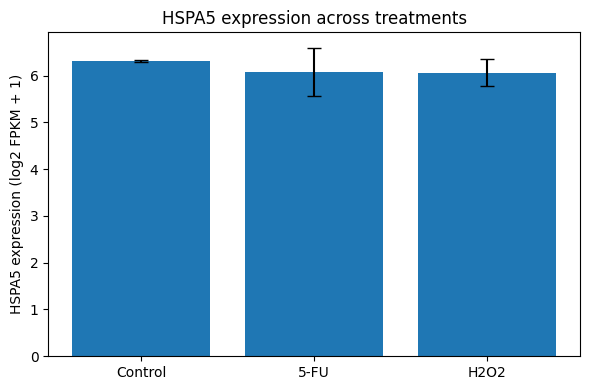

In [14]:
order = ["control", "FU", "H2O2"]
summary["Condition"] = pd.Categorical(
    summary["Condition"],
    categories=order,
    ordered=True
)
summary = summary.sort_values("Condition")

summary["Condition"] = summary["Condition"].map(labels)

plt.figure(figsize=(6,4))

plt.bar(
    summary["Condition"],
    summary["mean"],
    yerr=summary["std"],
    capsize=5
)

plt.ylabel("HSPA5 expression (log2 FPKM + 1)")
plt.title("HSPA5 expression across treatments")

plt.tight_layout()
plt.show()


# Define UPR Genes

In [15]:
upr_genes = [
    "HSPA5",
    "DDIT3",
    "ATF4",
    "XBP1",
    "ERN1",
    "EIF2AK3",
    "ATF6",
    "DNAJB9",
    "HERPUD1",
    "PDIA4"
]

# Collapse Isoforms → Gene-Level

In [16]:
# Expression columns
expr_cols = [col for col in expr.columns if "_" in col]

# Keep only UPR genes
upr_df = expr[expr["gene_name"].isin(upr_genes)]

# Collapse transcript isoforms (SUM per gene)
upr_gene_level = (
    upr_df
    .groupby("gene_name")[expr_cols]
    .sum()
)

# Individual Barplots

/tmp/ipython-input-3695944932.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Condition")["log2_FPKM"]


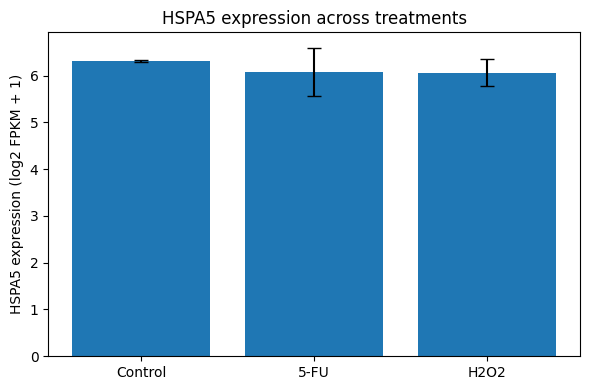

/tmp/ipython-input-3695944932.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Condition")["log2_FPKM"]


DDIT3 not found, skipping
ATF4 not found, skipping


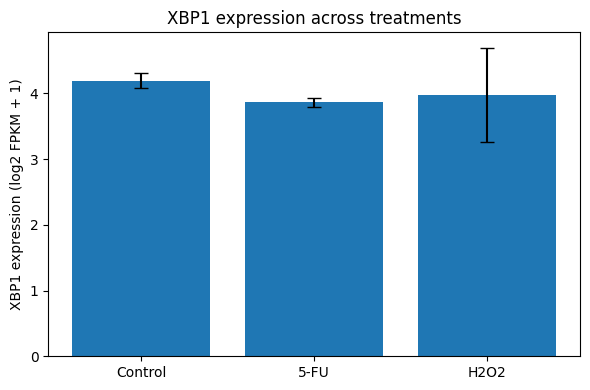

/tmp/ipython-input-3695944932.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Condition")["log2_FPKM"]


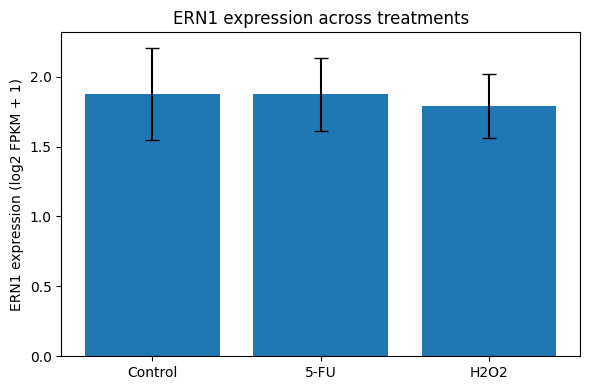

/tmp/ipython-input-3695944932.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Condition")["log2_FPKM"]


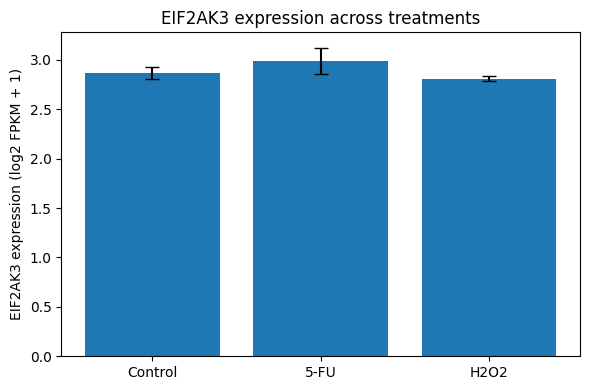

/tmp/ipython-input-3695944932.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Condition")["log2_FPKM"]


ATF6 not found, skipping


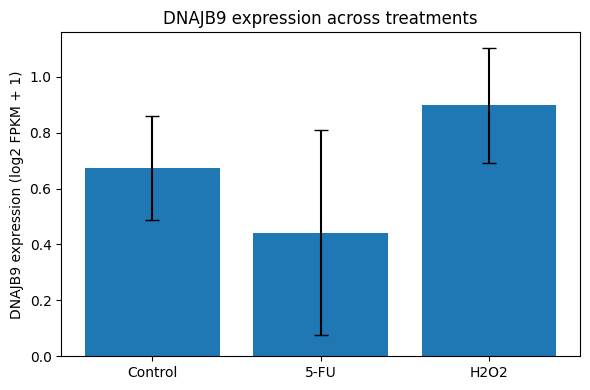

/tmp/ipython-input-3695944932.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Condition")["log2_FPKM"]


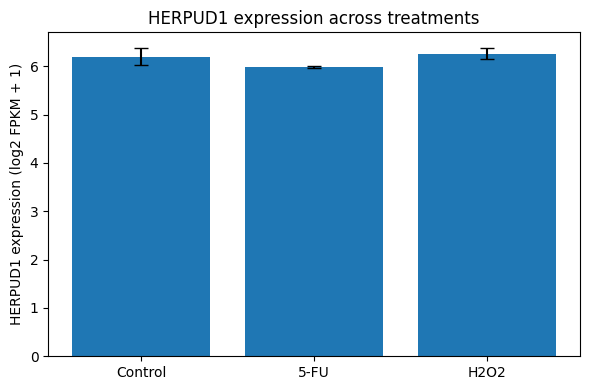

/tmp/ipython-input-3695944932.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Condition")["log2_FPKM"]


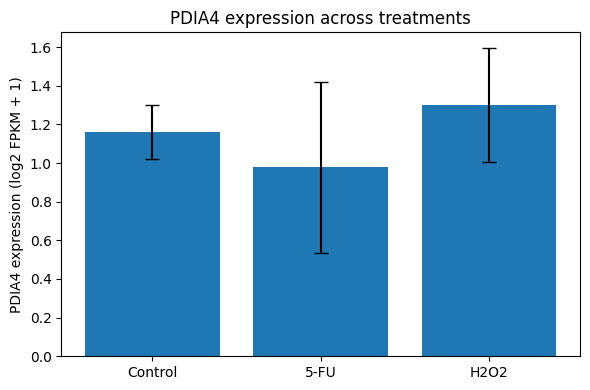

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

order = ["control", "FU", "H2O2"]
labels = {
    "control": "Control",
    "FU": "5-FU",
    "H2O2": "H2O2"
}

for gene in upr_genes:

    if gene not in upr_gene_level.index:
        print(f"{gene} not found, skipping")
        continue

    # Extract gene row and ensure numeric
    df = upr_gene_level.loc[gene].to_frame(name="FPKM")
    df["FPKM"] = pd.to_numeric(df["FPKM"], errors="coerce")  # <-- force numeric, NaN if invalid

    # Extract condition from sample names
    df["Condition"] = df.index.str.split("_").str[0]
    df["Condition"] = pd.Categorical(df["Condition"], order, ordered=True)

    # Log2 normalization
    df["log2_FPKM"] = np.log2(df["FPKM"] + 1)

    # Aggregate mean ± SD per condition
    summary = (
        df.groupby("Condition")["log2_FPKM"]
        .agg(mean="mean", std="std")
        .reset_index()
        .sort_values("Condition")
    )

    # Map nicer labels for plotting
    summary["Condition"] = summary["Condition"].map(labels)

    # Plot
    plt.figure(figsize=(6,4))
    plt.bar(summary["Condition"], summary["mean"], yerr=summary["std"], capsize=5)
    plt.ylabel(f"{gene} expression (log2 FPKM + 1)")
    plt.title(f"{gene} expression across treatments")
    plt.tight_layout()
    plt.show()


# ER-stress heatmap


/tmp/ipython-input-5966409.py:11: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  gene_expr_cond = gene_expr_cond.groupby(axis=1, level=0).mean()


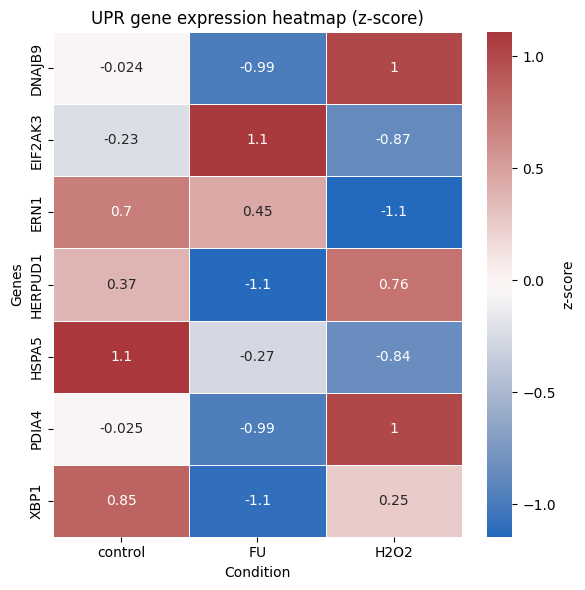

In [35]:
import seaborn as sns

# 1️⃣ Préparer le DataFrame gènes x conditions
gene_expr = upr_gene_level.copy()

# Extraire les colonnes d'expression et renommer selon condition
gene_expr_cond = gene_expr[expr_cols].copy()
gene_expr_cond.columns = [col.split("_")[0] for col in gene_expr_cond.columns]

# Agréger par condition (moyenne si plusieurs échantillons)
gene_expr_cond = gene_expr_cond.groupby(axis=1, level=0).mean()

# Appliquer log2(FPKM + 1)
gene_expr_cond = np.log2(gene_expr_cond + 1)

# 2️⃣ Calculer le z-score par ligne (par gène)
gene_expr_z = gene_expr_cond.sub(gene_expr_cond.mean(axis=1), axis=0)
gene_expr_z = gene_expr_z.div(gene_expr_cond.std(axis=1), axis=0)

# 3️⃣ Réordonner les colonnes comme tu veux
order = ["control", "FU", "H2O2"]
gene_expr_z = gene_expr_z[order]

# 4️⃣ Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(
    gene_expr_z,
    cmap="vlag",
    annot=True,
    linewidths=0.5,
    cbar_kws={'label': 'z-score'}
)
plt.title("UPR gene expression heatmap (z-score)")
plt.ylabel("Genes")
plt.xlabel("Condition")
plt.tight_layout()
plt.show()
